In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import *

In [3]:
tapes = get_Tapes(125)

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

In [4]:
def resample_tape(tape, freq="1s"):
    resampled_df = tape
    resampled_df["Price*Volume"] = resampled_df["Price"] * resampled_df["Volume"]
    resampled_df = resampled_df.resample(freq).sum()
    resampled_df["Price"] = resampled_df["Price*Volume"] / resampled_df["Volume"]
    resampled_df["Price"] = resampled_df["Price"].fillna(method='ffill')
    return resampled_df

def resamples_tapes(tapes, freq="1s"):
    resampled_tapes = {}
    for i,tape in enumerate(tapes):
        resampled_tapes[i] = resample_tape(tape, freq)
    return resampled_tapes

In [5]:
resampled_tapes = resamples_tapes(tapes, freq="1s")

In [6]:
tapes_summ = pd.DataFrame()

for i in resampled_tapes:
    avg_price = resampled_tapes[i]["Price"].mean()
    vol = resampled_tapes[i]["Volume"].sum()
    trend = resampled_tapes[i]["Price"].diff().mean()
    std = resampled_tapes[i]["Price"].std()
    min = resampled_tapes[i]["Price"].min()
    q25 = resampled_tapes[i]["Price"].quantile(0.25)
    q50 = resampled_tapes[i]["Price"].quantile(0.50)
    q75 = resampled_tapes[i]["Price"].quantile(0.75)
    max = resampled_tapes[i]["Price"].max()
    tapes_summ = tapes_summ.append({"Avg_Price": avg_price, "Volume": vol, "Trend": trend, "Std": std, "Min": min, "Q25": q25, "Q50": q50, "Q75": q75, "Max": max}, ignore_index=True)

C:\Users\benjo\AppData\Local\Temp\ipykernel_9976\3016133249.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tapes_summ = tapes_summ.append({"Avg_Price": avg_price, "Volume": vol, "Trend": trend, "Std": std, "Min": min, "Q25": q25, "Q50": q50, "Q75": q75, "Max": max}, ignore_index=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_9976\3016133249.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tapes_summ = tapes_summ.append({"Avg_Price": avg_price, "Volume": vol, "Trend": trend, "Std": std, "Min": min, "Q25": q25, "Q50": q50, "Q75": q75, "Max": max}, ignore_index=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_9976\3016133249.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tapes_summ = tapes_summ.append({"Avg

In [7]:
tapes_summ.head()

,Avg_Price,Volume,Trend,Std,Min,Q25,Q50,Q75,Max
0,281.665176,47973.0,0.000752,12.500882,243.0,274.000000,286.000000,291.000000,303.0
1,296.287712,51992.0,0.000340,7.544433,270.0,291.000000,296.000000,301.191667,317.0
2,311.951727,48047.0,0.001602,13.995817,276.0,300.000000,313.291667,323.000000,346.0
3,356.419124,44335.0,0.001152,16.690889,317.0,339.309524,359.400000,371.000000,387.0
4,336.118059,44859.0,-0.001765,13.315800,303.0,326.000000,334.000000,346.333333,374.0


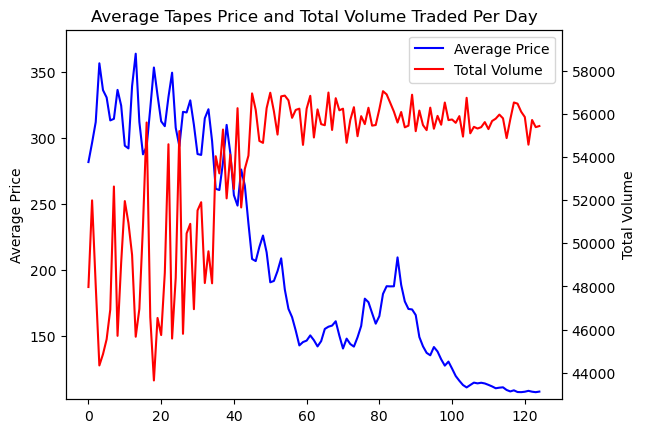

In [62]:
# plot price and total volume traded on dual axis
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(tapes_summ["Avg_Price"], color="blue", label = "Average Price")
ax1.set_ylim(tapes_summ["Avg_Price"].min()* 0.95, tapes_summ["Avg_Price"].max() * 1.05)
ax2 = ax1.twinx()
ax2.plot(tapes_summ["Volume"], color="red", label = "Total Volume")
ax2.set_ylim(tapes_summ["Volume"].min()* 0.98, tapes_summ["Volume"].max() * 1.05)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1)
ax1.set_ylabel("Average Price")
ax2.set_ylabel("Total Volume")
plt.title("Average Tapes Price and Total Volume Traded Per Day")
plt.show()